In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
biomass_data = pd.read_csv("../data/cleaned/biomass_data.csv")
data_and_chart = pd.read_csv("../data/cleaned/data_and_chart.csv")
sea_surface_temp = pd.read_csv("../data/cleaned/sea_surface_temp.csv")
co2_emissions = pd.read_csv("../data/cleaned/global_co2.csv")

In [3]:
print("Biomass Data Overview")
print(biomass_data.info())
print(biomass_data.head(), "\n")

Biomass Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             826 non-null    object 
 1   Year               826 non-null    int64  
 2   BiomassMeanRegion  826 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 19.5+ KB
None
                 Entity  Year  BiomassMeanRegion
0  Atlantic Ocean tunas  1970              1.790
1  Atlantic Ocean tunas  1971              1.695
2  Atlantic Ocean tunas  1972              1.655
3  Atlantic Ocean tunas  1973              1.670
4  Atlantic Ocean tunas  1974              1.670 



In [4]:
print("Data and Chart Overview")
print(data_and_chart.info())
print(data_and_chart.head(), "\n")

Data and Chart Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     339 non-null    object 
 1   Year                     38 non-null     float64
 2   pH                       38 non-null     float64
 3   Uncertainty              38 non-null     float64
 4   Lower uncertainty limit  38 non-null     float64
 5   Upper uncertainty limit  38 non-null     float64
dtypes: float64(5), object(1)
memory usage: 16.0+ KB
None
       Date    Year        pH  Uncertainty  Lower uncertainty limit  \
0  10/31/88  1985.0  8.110209        0.017                    8.093   
1   12/2/88  1986.0  8.109020        0.016                    8.093   
2    1/8/89  1987.0  8.107591        0.016                    8.092   
3   2/26/89  1988.0  8.104618        0.015                    8.089   
4   3/27/89  1989.0  8.1033

In [5]:
print("Sea Surface Temperature Overview")
print(sea_surface_temp.info())
print(sea_surface_temp.head(), "\n")

Sea Surface Temperature Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  149 non-null    object
 1   Value1       145 non-null    object
 2   Value2       145 non-null    object
 3   Value3       145 non-null    object
dtypes: object(4)
memory usage: 4.8+ KB
None
                                         Description          Value1  \
0  Source: EPA's Climate Change Indicators in the...             NaN   
1                            Data source: NOAA, 2024             NaN   
2                              Web update: June 2024             NaN   
3                    Units: temperature anomaly (°F)             NaN   
4                                               Year  Annual anomaly   

                          Value2                         Value3  
0                            NaN                            NaN  
1      

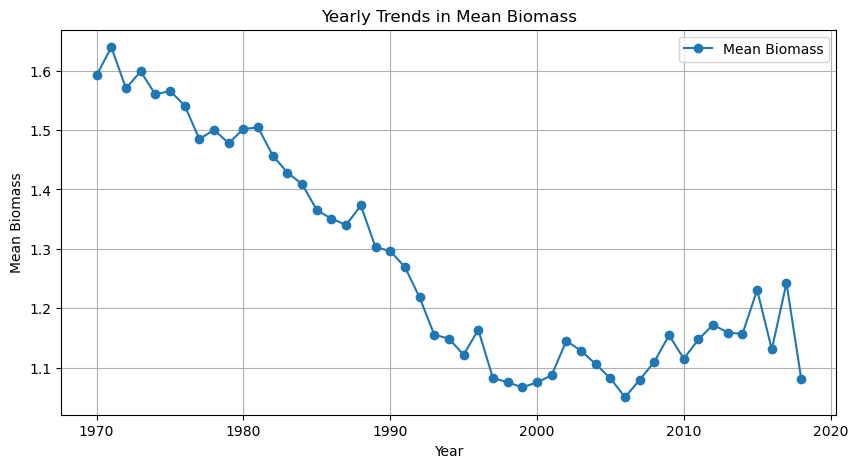

In [6]:
biomass_yearly = biomass_data.groupby("Year")["BiomassMeanRegion"].mean()

plt.figure(figsize=(10, 5))
plt.plot(biomass_yearly.index, biomass_yearly.values, marker='o', linestyle='-', label="Mean Biomass")
plt.title("Yearly Trends in Mean Biomass")
plt.xlabel("Year")
plt.ylabel("Mean Biomass")
plt.legend()
plt.grid()
plt.savefig('../result/biomass_yearly_trend.png')
plt.show()


/var/folders/_c/cbt8xxhx1q18s6z108pfn5d00000gn/T/ipykernel_61294/4012538073.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_and_chart["Year"] = data_and_chart["Year"].fillna(method='ffill').astype(int)  # Fill missing years


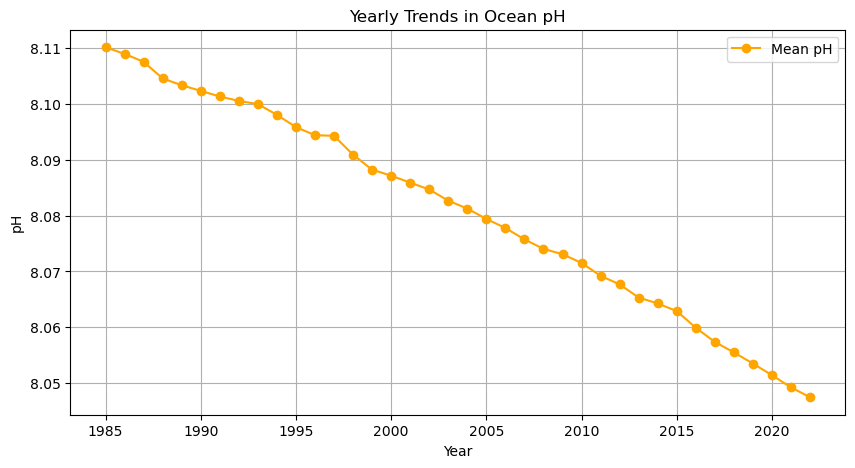

In [7]:
data_and_chart["Year"] = data_and_chart["Year"].fillna(method='ffill').astype(int)  # Fill missing years
pH_yearly = data_and_chart.groupby("Year")["pH"].mean()

plt.figure(figsize=(10, 5))
plt.plot(pH_yearly.index, pH_yearly.values, marker='o', linestyle='-', color='orange', label="Mean pH")
plt.title("Yearly Trends in Ocean pH")
plt.xlabel("Year")
plt.ylabel("pH")
plt.legend()
plt.grid()
plt.savefig('../result/ph_yearly_trend.png')
plt.show()

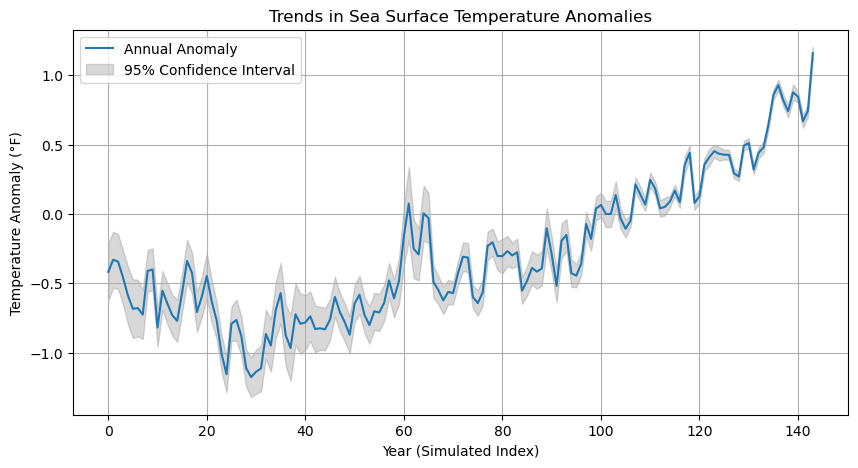

In [8]:
try:
    sea_surface_temp["Value1"] = pd.to_numeric(sea_surface_temp["Value1"], errors='coerce')
    sea_surface_temp["Value2"] = pd.to_numeric(sea_surface_temp["Value2"], errors='coerce')
    sea_surface_temp["Value3"] = pd.to_numeric(sea_surface_temp["Value3"], errors='coerce')
    sea_surface_temp = sea_surface_temp.dropna()

    sea_surface_temp["Year"] = range(len(sea_surface_temp))

    plt.figure(figsize=(10, 5))
    plt.plot(sea_surface_temp["Year"], sea_surface_temp["Value1"], label="Annual Anomaly")
    plt.fill_between(sea_surface_temp["Year"], 
                     sea_surface_temp["Value2"], 
                     sea_surface_temp["Value3"], 
                     color='gray', alpha=0.3, label="95% Confidence Interval")
    plt.title("Trends in Sea Surface Temperature Anomalies")
    plt.xlabel("Year (Simulated Index)")
    plt.ylabel("Temperature Anomaly (°F)")
    plt.legend()
    plt.grid()
    plt.savefig('../result/temp_yearly_trend.png')
    plt.show()
except Exception as e:
    print("Unable to generate numerical trends for Sea Surface Temperature data:", e)

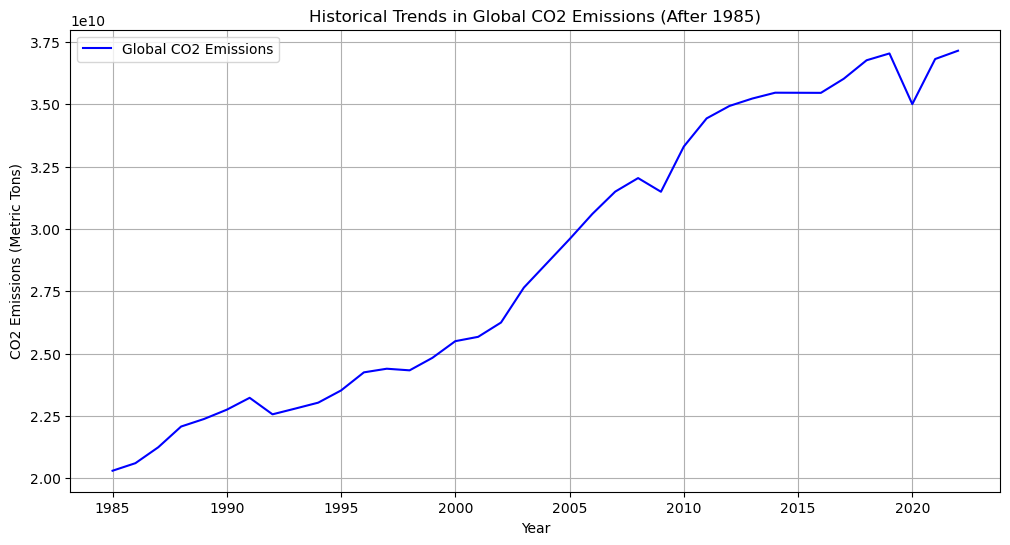

In [12]:
co2_emissions_filtered = co2_emissions[co2_emissions['year'] >= 1985]

# Plot the filtered data
plt.figure(figsize=(12, 6))
plt.plot(co2_emissions_filtered['year'], co2_emissions_filtered['co2'], label="Global CO2 Emissions", color='blue')
plt.title("Historical Trends in Global CO2 Emissions (After 1985)")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Metric Tons)")
plt.grid()
plt.legend()
plt.savefig('../result/co2_trend.png')
plt.show()
